This is the initial EDA of the sales and shipment of products and building of models for determining the shipping cost based on the variables involved in shipping

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime, date, time

# Reading the dataset into the notebook
df = pd.read_csv('sales.csv')
df.head()

C:\Users\Damilola\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Let's get a better understanding of the data
df.describe()

Order ID  Order Quantity  Unit Sell Price  Unit Cost Price  \
count   8399.000000     8399.000000      8399.000000      8399.000000   
mean   29965.183950       25.571735        89.346259        22.737826   
std    17260.883221       14.481071       290.354383        92.055619   
min        3.000000        1.000000         0.990000         1.000000   
25%    15011.500000       13.000000         6.480000         2.000000   
50%    29857.000000       26.000000        20.990000         4.000000   
75%    44596.000000       38.000000        85.990000        18.000000   
max    59973.000000       50.000000      6783.020000      3159.000000   

       Shipping Amount          Cost  Discount Amount  Discount Cost  \
count      8399.000000   8399.000000      8399.000000    8399.000000   
mean         12.838557   1846.312055        91.276222    1755.035833   
std          17.264052   3710.265557       219.699498    3538.264045   
min           0.490000      1.480000         0.000000       1.465200   
25%           3.300000    140.150000         3.787500     133.221700   
50%           6.070000    450.890000        16.128000     427.700000   
75%          13.990000   1781.645000        72.720750    1681.944050   
max         164.730000  88179.260000      4883.774400   88179.260000   

       Total Discounted Cost  
count            8399.000000  
mean             1767.874390  
std              3545.674373  
min                 2.165200  
25%               138.570550  
50%               437.350000  
75%              1705.749900  
max             88203.750000

In [4]:
# Data format of the columns
df.dtypes

Order ID                   int64
Customer ID               object
Sales Person              object
Order Date                object
Ship Date                 object
Order Priority            object
SKU Code                  object
Order Quantity             int64
Unit Sell Price          float64
Unit Cost Price            int64
Discount Percent          object
Shipping Amount          float64
Ship Mode                 object
Container                 object
Cost                     float64
Discount Amount          float64
Discount Cost            float64
Total Discounted Cost    float64
dtype: object

In [5]:
# Checking if there is any missing values in the data
df.isnull().sum()

Order ID                 0
Customer ID              0
Sales Person             0
Order Date               0
Ship Date                0
Order Priority           0
SKU Code                 0
Order Quantity           0
Unit Sell Price          0
Unit Cost Price          0
Discount Percent         0
Shipping Amount          0
Ship Mode                0
Container                0
Cost                     0
Discount Amount          0
Discount Cost            0
Total Discounted Cost    0
dtype: int64

## Data visualization

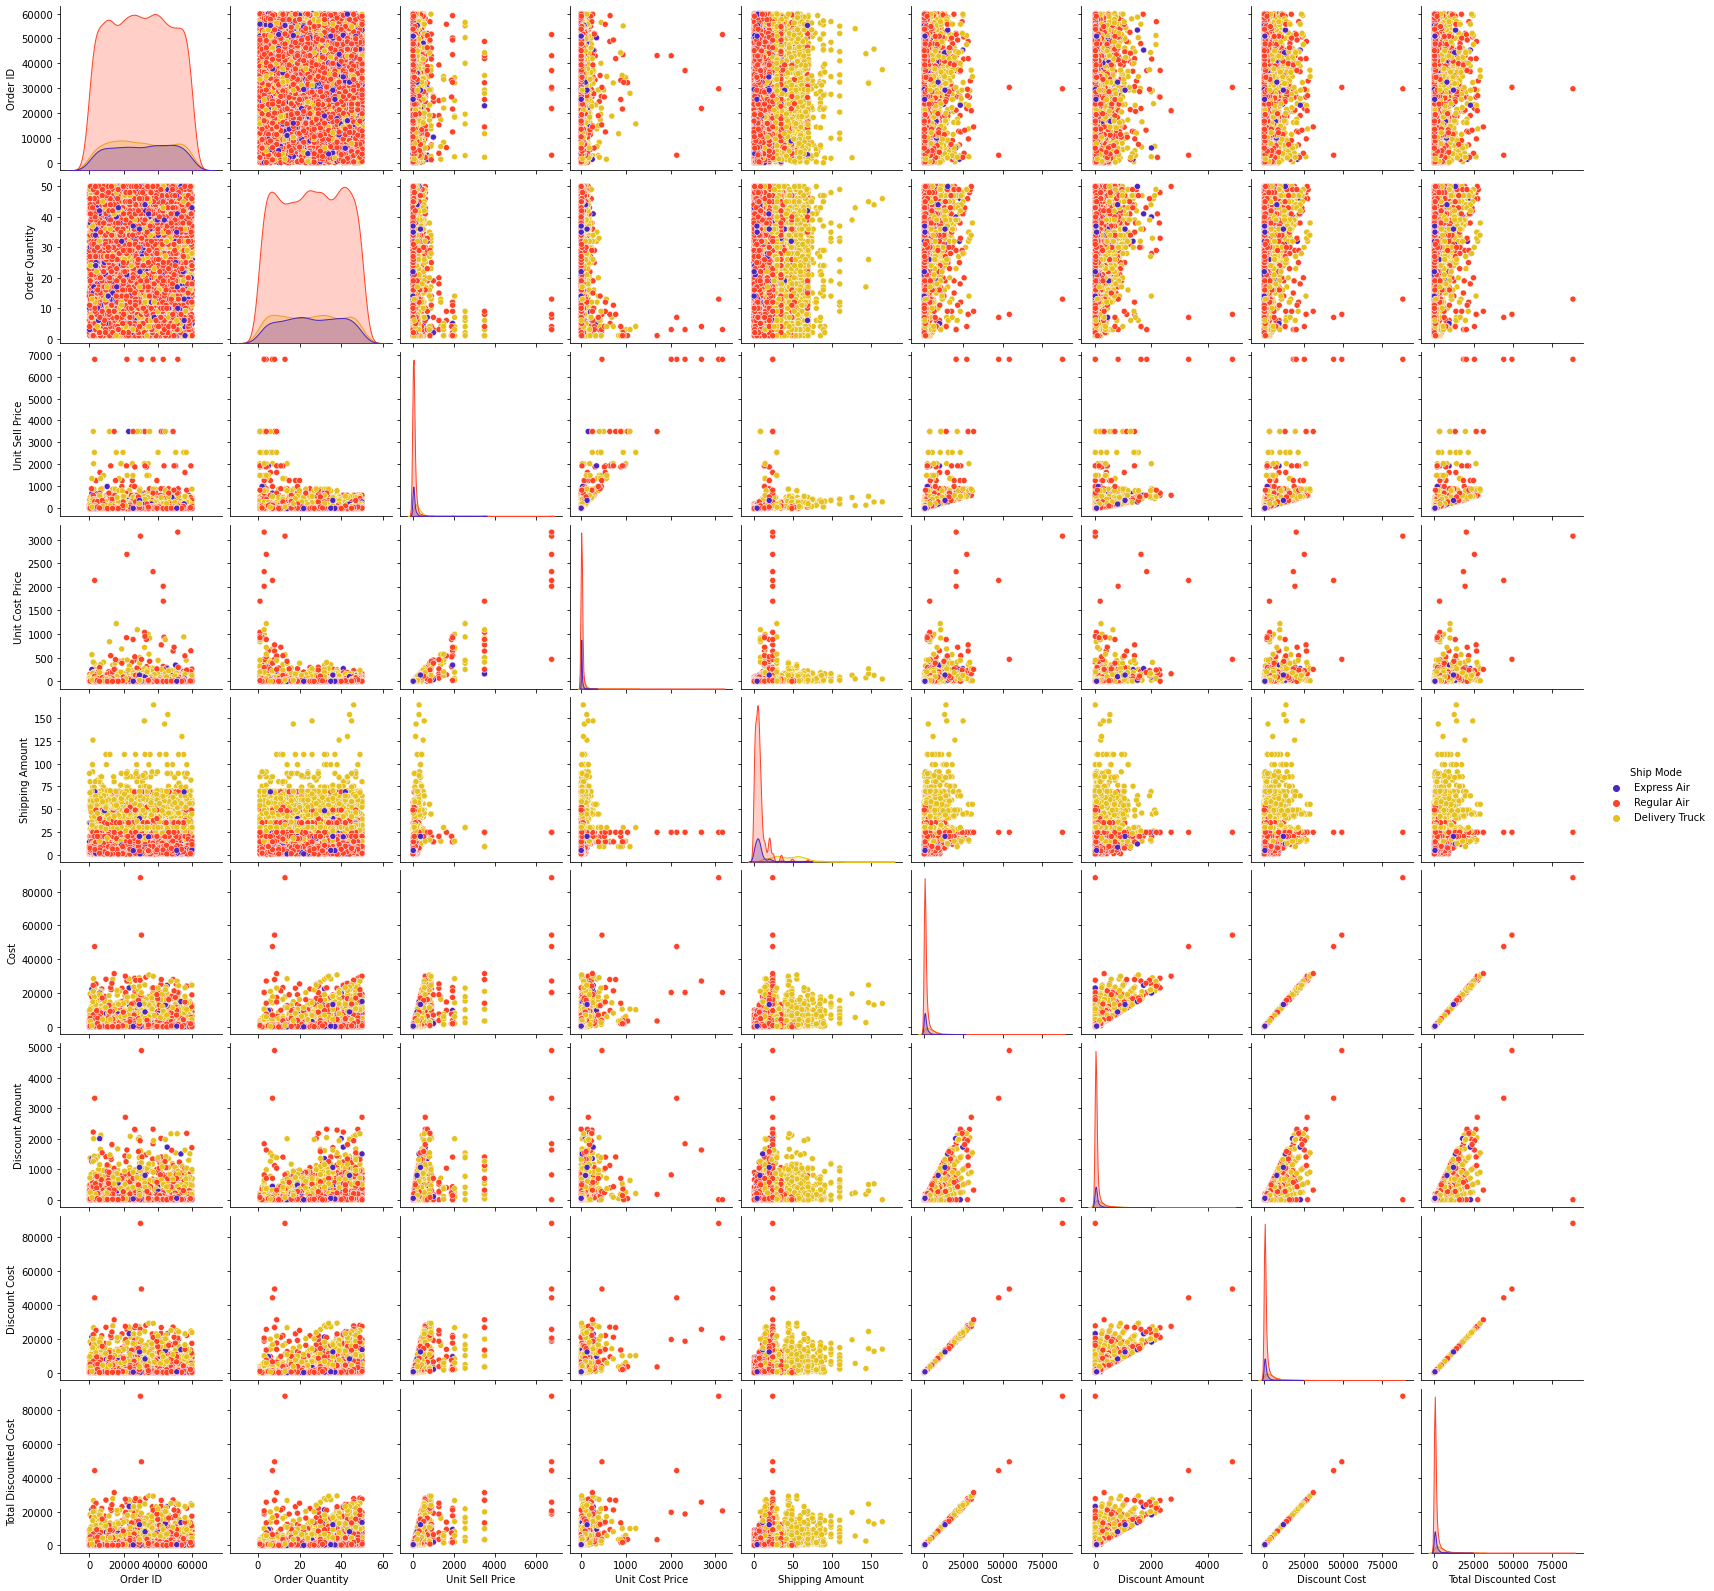

In [6]:
# Pair plot with mode of shipping
sns.pairplot(df, hue = 'Ship Mode', palette = "CMRmap")
plt.show()

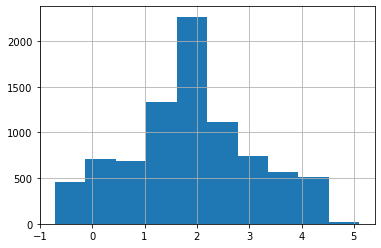

In [7]:
# Plot showing the log distribution of the shipping amount
log_shipping_amount = np.log(df['Shipping Amount'])
log_shipping_amount.hist()
plt.show()

<AxesSubplot:>

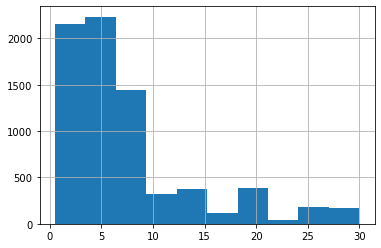

In [8]:
# Checking the distribution of the shipping amout column without using log distribution
Q3 = np.quantile(df['Shipping Amount'], 0.75)
Q1 = np.quantile(df['Shipping Amount'], 0.25)
IQR = Q3 - Q1

upper_range = Q3 + 1.5 * IQR

out_rmv = df[df['Shipping Amount'] < upper_range]
out_rmv['Shipping Amount'].hist()

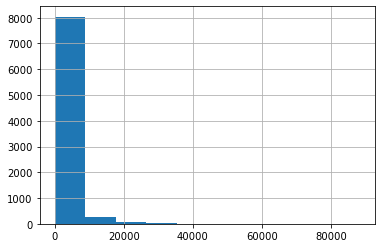

In [9]:
# Plot showing the distribution of the Total amount
df['Total Discounted Cost'].hist()
plt.show()

As seen in below, small box containers are the most used means of delivery regardless of the shipping mode

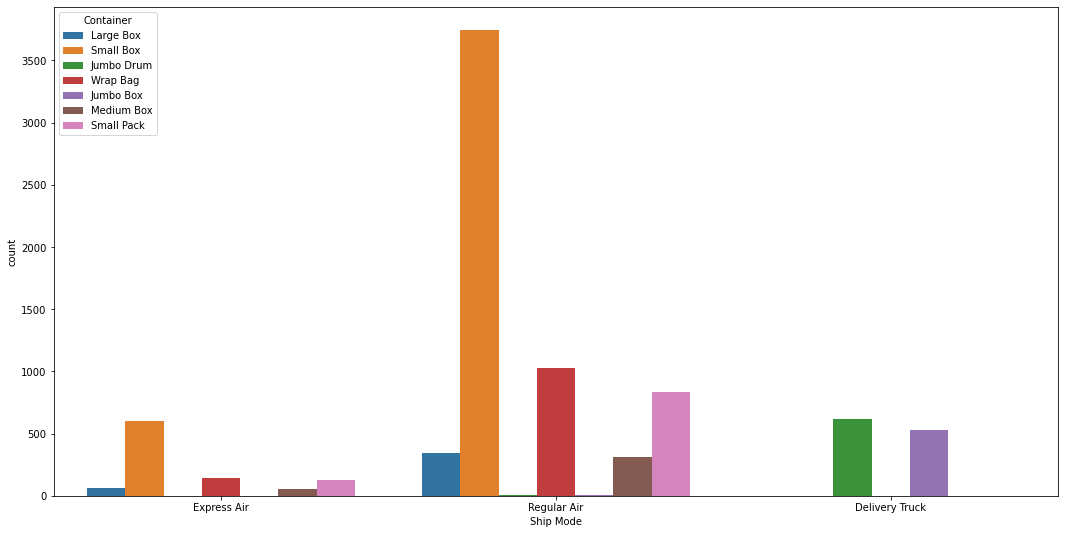

In [10]:
# A plot of the number of times contianers column was used with the shipping mode
plt.figure(figsize = (18,9))
sns.countplot(x= 'Ship Mode', hue = 'Container', data = df)
plt.show()

The box plot below shows that with regards to shipping amount and container there are sevreal outliers but this can be attributed to the order quatity

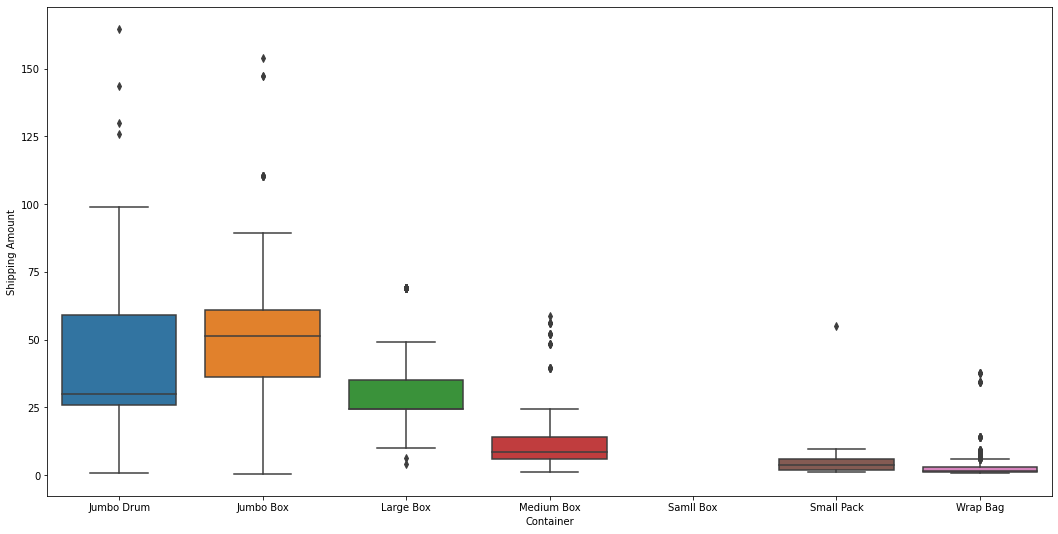

In [11]:
# Boxplot showing the distributing of shipping amount of containers
plt.figure(figsize = (18,9))
sns.boxplot(x = "Container", y = "Shipping Amount", data = df, order = ['Jumbo Drum', 'Jumbo Box', 'Large Box', "Medium Box", "Samll Box", 'Small Pack', 'Wrap Bag'])
plt.show()

As seen in the plot above, there are a lot of outliers with the jumbo containers (Jumbo drums and Jumbo box) having the the widest distribution range and jumbo box having the highest median and wrap bag having the lowest median

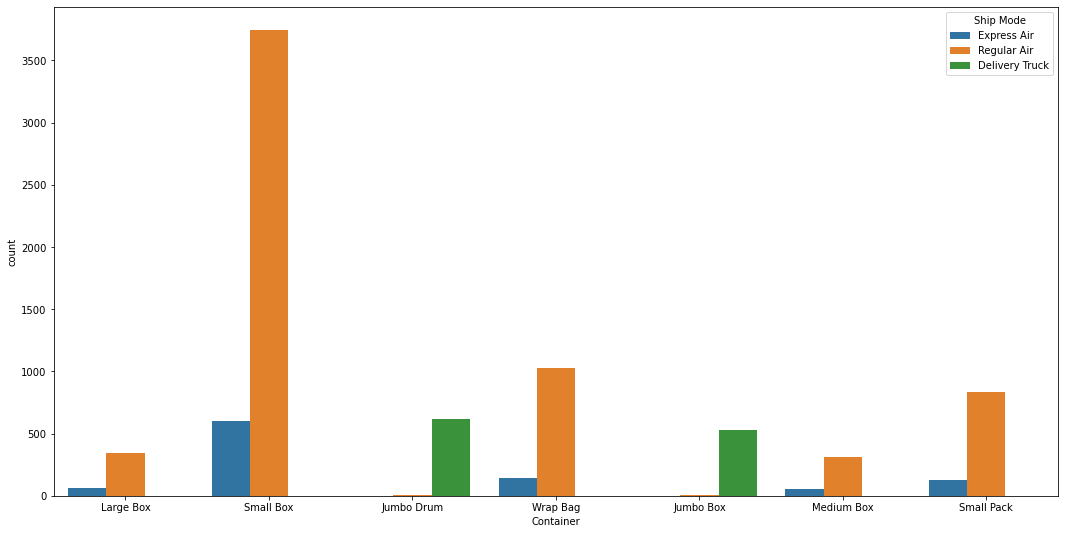

In [12]:
# A look at container type to shipping mode
plt.figure(figsize = (18,9))
sns.countplot(x = "Container", hue = "Ship Mode", data = df)
plt.show()

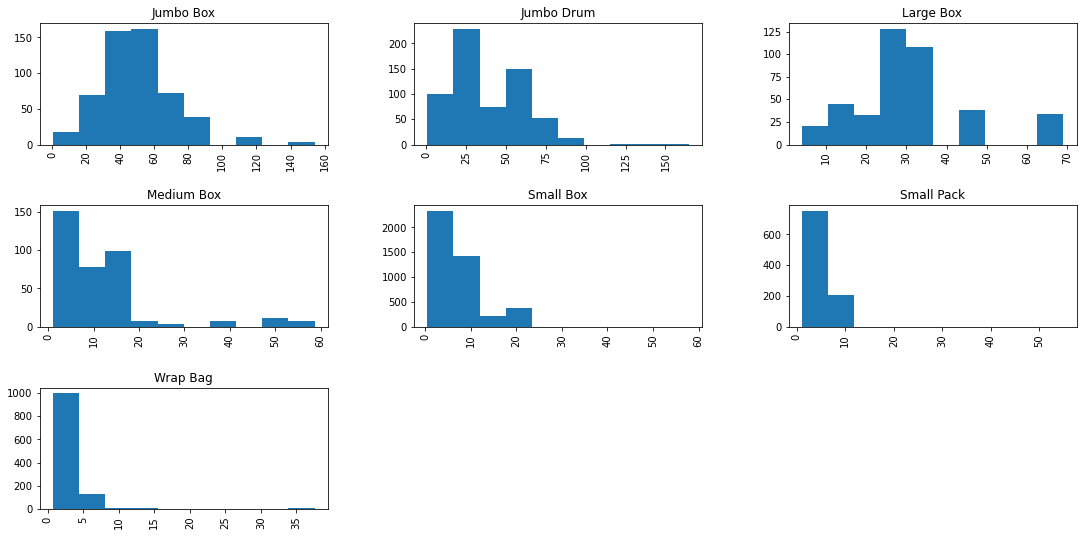

In [13]:
# Shipping amount distribution to container
df.hist(by = "Container", column = "Shipping Amount", figsize =( 18,9))
plt.show()

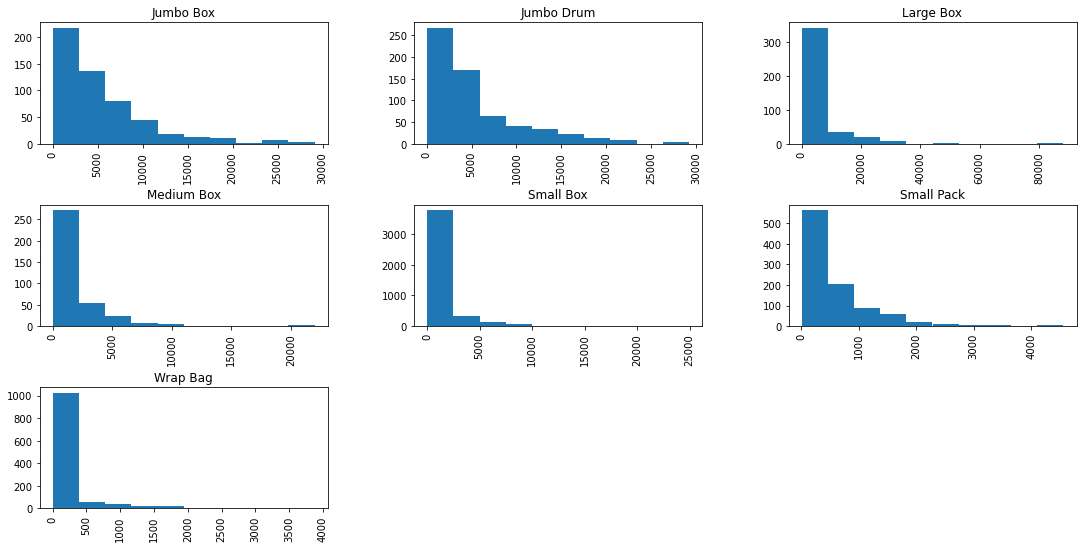

In [14]:
# Total discounted amount distribution to container
df.hist(by = "Container", column = "Total Discounted Cost", figsize =( 18,9))
plt.show()

The histograms above show that majority of the goods with regard to their containers are below 1000 with the histogram distributions showing a skewness to the right. This indicates there are more values 

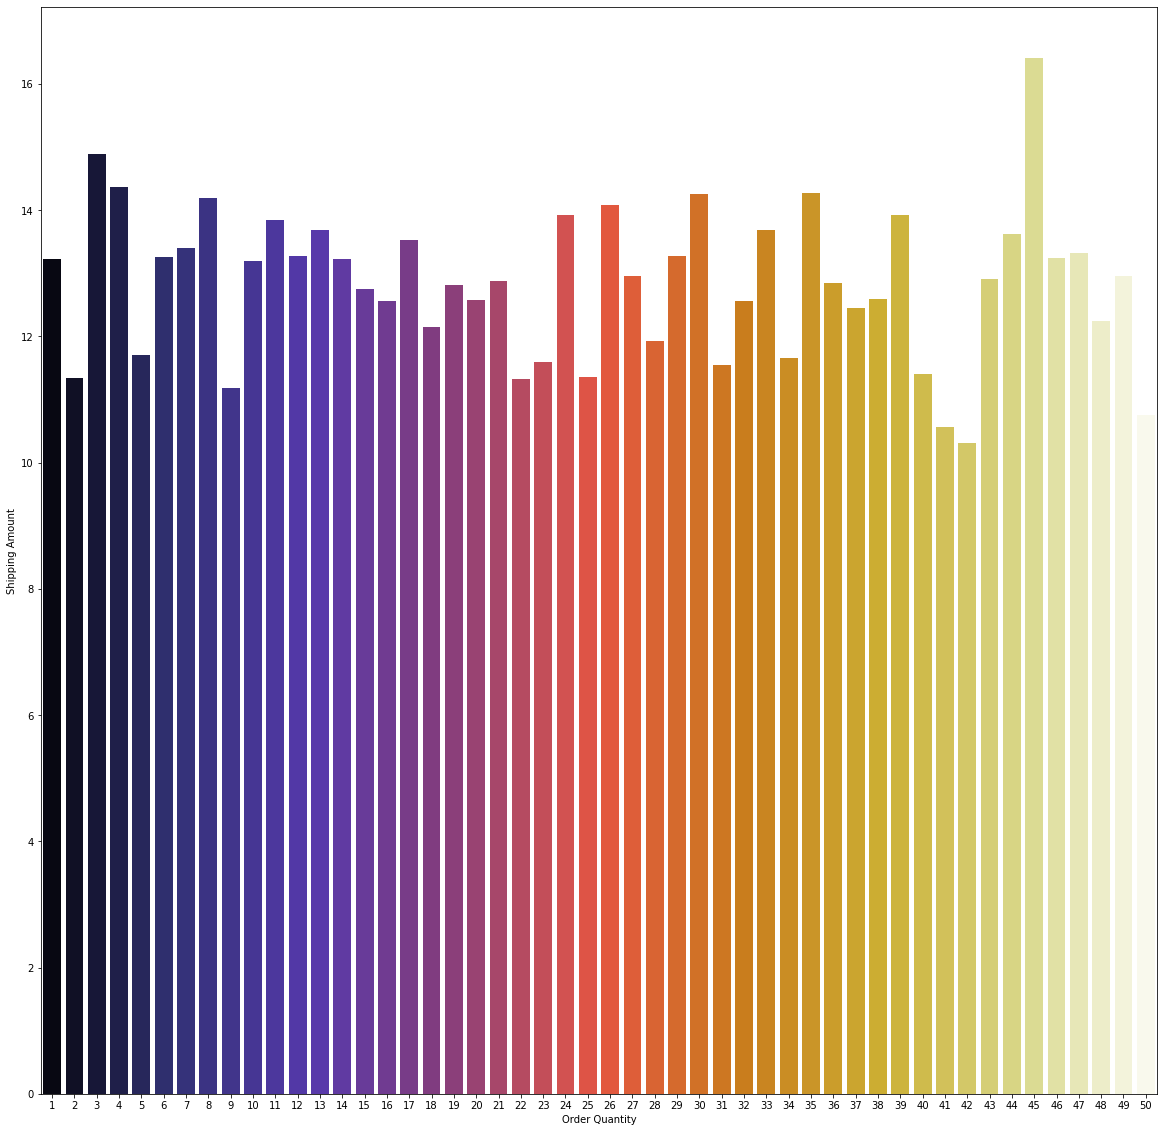

In [15]:
# Shipping amount to order quantity
plt.figure(figsize = (20,20))
sns.barplot(x = 'Order Quantity', y = 'Shipping Amount', data = df, palette = "CMRmap", ci = None)
plt.show()

In [3]:
#Format the date columns 
df['Order Date'] = pd.to_datetime(df["Order Date"], errors= "coerce")
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors= "coerce")

In [4]:
# Creating day, year and month columns
import datetime as dt
df["Ship Day"]=df['Ship Date'].dt.day
df['Ship Year']=df['Ship Date'].dt.year
df['Ship Month']=df['Ship Date'].dt.month

In [5]:
# A copy of the dataframe to be used
df2 = df.copy()

In [6]:
# Converting object columns to categorical columns
cols = ['Order Priority', 'Ship Mode', 'Container']
df2[cols] = df2[cols].astype('category')

Order ID                -0.004582
Order Quantity          -0.011457
Unit Sell Price          0.239959
Unit Cost Price          0.194791
Shipping Amount          1.000000
Cost                     0.427822
Discount Amount          0.344250
Discount Cost            0.427244
Total Discounted Cost    0.431221
Ship Day                -0.021660
Ship Year               -0.008038
Ship Month               0.003519
Name: Shipping Amount, dtype: float64


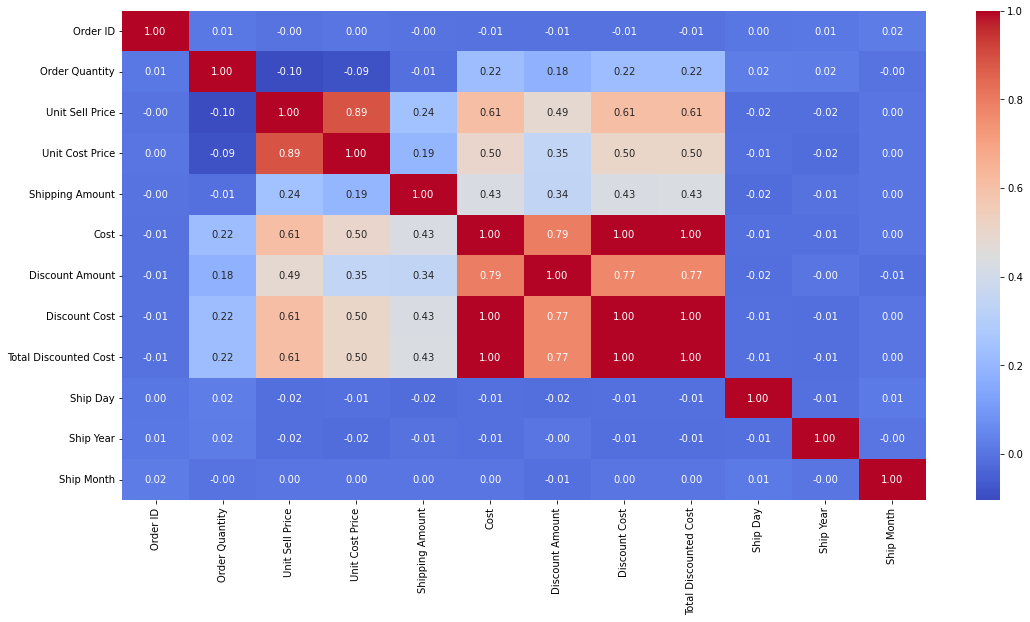

In [7]:
# A look at the corrolation between features
corr = df.corr()
print(corr['Shipping Amount'])

# Plotting correlation heatmap
plt.figure(figsize = (18,9))
sns.heatmap(corr, annot = True, fmt =".2f", cmap = "coolwarm")
plt.show()